In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Đọc dữ liệu
df = pd.read_csv('SONY.csv', index_col=0, parse_dates=True)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,45.860001,45.959999,45.330002,45.560001,45.560001,2192700
2017-12-04,46.250000,46.340000,45.750000,45.779999,45.779999,992800
2017-12-05,45.759998,46.200001,45.730000,45.869999,45.869999,554900
2017-12-06,44.990002,45.009998,44.650002,44.910000,44.910000,970700
2017-12-07,45.209999,45.849998,45.209999,45.750000,45.750000,809200
2017-12-08,45.709999,45.860001,45.540001,45.790001,45.790001,622700
2017-12-11,44.650002,44.919998,44.630001,44.900002,44.900002,950400
2017-12-12,44.500000,44.730000,44.369999,44.630001,44.630001,913300
2017-12-13,44.619999,44.720001,44.529999,44.650002,44.650002,734200


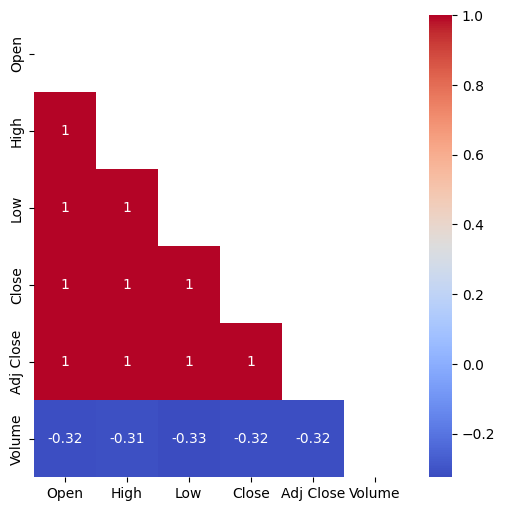

In [ ]:
mask = np.triu(df.corr())
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)
plt.show()

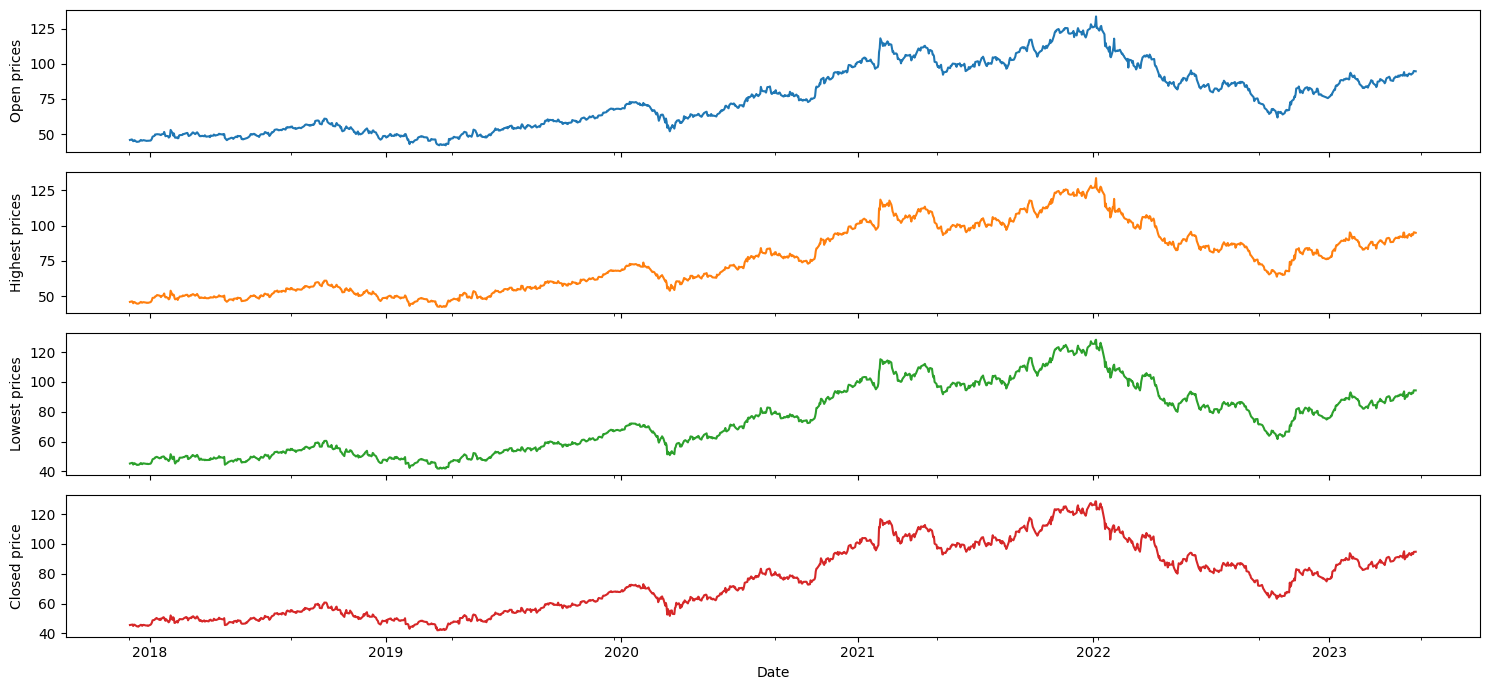

In [ ]:
df = df[['Open','High', 'Low', 'Close']]
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15,7))
df.plot(subplots=True, ax=ax, legend=False)
y_label = ['Open prices','Highest prices', 'Lowest prices','Closed price']
for a in range(len(ax)):
    ax[a].set_ylabel(f"{y_label[a]}")
plt.tight_layout()
plt.show()

In [ ]:
#Chia dữ liệu theo tỉ lệ 7:2:1
from sklearn.model_selection import train_test_split

total_length = len(df)

train_length = int(total_length * 0.7)  # 70% for training
test_length = int(total_length * 0.2)  # 20% for testing
validate_length = total_length - train_length - test_length  # Remaining 10% for validation

train_data = df[:train_length]
test_data = df[train_length:train_length + test_length]
validate_data = df[train_length + test_length:]

In [ ]:
#Kiểm tra tính dừng với ADF
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
        print("---------------------------------------")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        print("------------------------------------------")

In [ ]:
#Kết quả kiểm tra của dữ liệu gốc
adf_test(train_data['Open'], 'Open prices')
adf_test(train_data['High'], 'Highest prices')
adf_test(train_data['Low'], 'Lowest prices')
adf_test(train_data['Close'], 'Closed prices')

Augmented Dickey-Fuller Test: Open prices
ADF test statistic        0.222938
p-value                   0.973519
# lags used               0.000000
# observations          958.000000
critical value (1%)      -3.437194
critical value (5%)      -2.864562
critical value (10%)     -2.568379
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
------------------------------------------
Augmented Dickey-Fuller Test: Highest prices
ADF test statistic        0.093502
p-value                   0.965615
# lags used               6.000000
# observations          952.000000
critical value (1%)      -3.437238
critical value (5%)      -2.864581
critical value (10%)     -2.568389
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
------------------------------------------
Augmented Dickey-Fuller Test: Lowest prices
ADF test statistic        0.126570
p-value           

In [ ]:
# Tiến hành diff dữ liệu
train_diff_data = train_data.diff().dropna()
test_diff_data = test_data.diff().dropna()
validate_diff_data = validate_data.diff().dropna()

In [ ]:
# Kết quả kiểm tra tính dừng của dữ liệu đã diff
adf_test(train_diff_data['Open'], 'Open prices')
adf_test(train_diff_data['High'], 'Highest prices')
adf_test(train_diff_data['Low'], 'Lowest prices')
adf_test(train_diff_data['Close'], 'Closed prices')

Augmented Dickey-Fuller Test: Open prices
ADF test statistic      -30.030533
p-value                   0.000000
# lags used               0.000000
# observations          957.000000
critical value (1%)      -3.437202
critical value (5%)      -2.864565
critical value (10%)     -2.568381
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary
---------------------------------------
Augmented Dickey-Fuller Test: Highest prices
ADF test statistic     -1.197301e+01
p-value                 3.858982e-22
# lags used             5.000000e+00
# observations          9.520000e+02
critical value (1%)    -3.437238e+00
critical value (5%)    -2.864581e+00
critical value (10%)   -2.568389e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary
---------------------------------------
Augmented Dickey-Fuller Test: Lowest prices
ADF test statistic      -20.262958
p-value                   0.000000
# lags used               1.000000


C:\Users\Duy\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


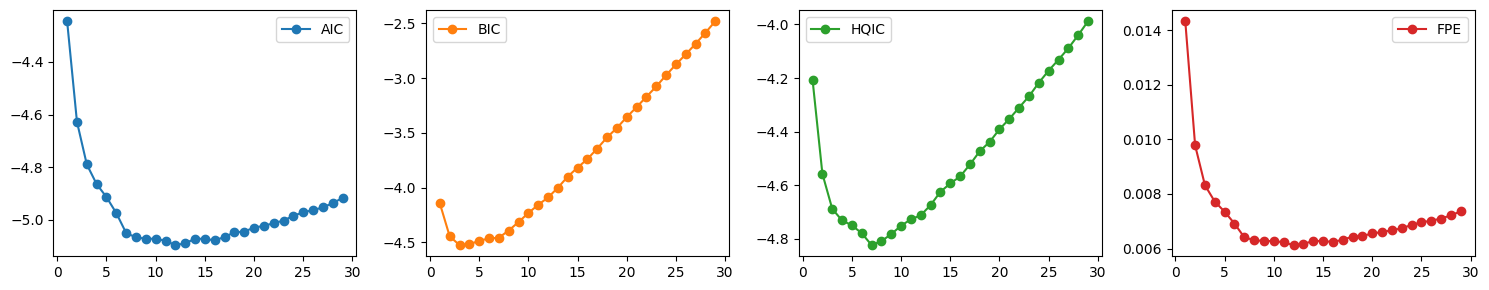

In [ ]:
aic, bic, fpe, hqic = [], [], [], []
model = VAR(train_diff_data)
p = np.arange(1,30)
for i in p:
    result = model.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic,
                                'BIC': bic,
                                'HQIC': hqic,
                                'FPE': fpe},
                               index=p)
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.tight_layout()

In [ ]:
#tìm p-order phù hợp
model = VAR(train_diff_data)
for i in range(10, 15):
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 10
AIC -5.0713738740113286
BIC -4.231591027629658

VAR Order 11
AIC -5.0792355428729765
BIC -4.156749970778474

VAR Order 12
AIC -5.09554869448146
BIC -4.090221481443227

VAR Order 13
AIC -5.089176615983671
BIC -4.000868462937456

VAR Order 14
AIC -5.071165232292677
BIC -3.8997364548761793



C:\Users\Duy\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#tiến hành fit mô hình với p-order
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 08, Jun, 2023
Time:                     23:52:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -4.09022
Nobs:                     946.000    HQIC:                  -4.71243
Log likelihood:          -2763.07    FPE:                 0.00612622
AIC:                     -5.09555    Det(Omega_mle):      0.00500570
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.057319         0.034477            1.663           0.096
L1.Open          -0.925185         0.099359           -9.312           0.000
L1.High           0.009852         0.116154            0.085           0.932


In [ ]:
#Dự báo dữ liệu diff
lag_order = model_fitted.k_ar  # Lag order of the model
def forecase_diff_data(diff_data, org_data, lag_order):
	forecast_input = diff_data.values[-lag_order:]  # Last lag_order number of observations from train_diff_data
	fc = model_fitted.forecast(y=forecast_input, steps=30)
	index = pd.date_range(org_data.index[-1], periods=30, freq='B')  # Assuming business days frequency
	fc_df = pd.DataFrame(fc, index=index, columns=train_data.columns + '_forecast')
	return fc_df

In [ ]:
#Dự báo trên tập test và 30 ngày tiếp theo
fc_test_diff = forecase_diff_data(train_diff_data, train_data, lag_order)
fc_validate_diff = forecase_diff_data(test_diff_data, test_data, lag_order)
fc_30next_diff = forecase_diff_data(validate_diff_data, validate_data, lag_order)

In [ ]:
#Chuyển dữ liệu diff đã dự báo về dữ liệu gốc
def invert_transformation(train_data, fc_df, second_diff=False):
    """Revert differencing and invert the transformation to get the forecasted values back to the original scale."""
    fc = fc_df.copy()
    fc.index.name = "Date"
    columns = train_data.columns
    for col in columns:
        # Cumulative sum
        fc[col + '_forecast'] = train_data[col].iloc[-1] + fc[col + '_forecast'].cumsum()
        # Second differencing if applied
        if second_diff:
            fc[col + '_forecast'] = train_data[col].iloc[-lag_order - 1] + fc[col + '_forecast'].cumsum()
    return fc

In [ ]:
fc_test_org = invert_transformation(train_data, fc_test_diff, second_diff=False)
fc_validate_org = invert_transformation(test_data, fc_validate_diff, second_diff=False)
fc_30next_org = invert_transformation(validate_data, fc_30next_diff, second_diff=False)

In [ ]:
#Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((fc_test_org.Close_forecast.values - test_data.Close.head(30).values)**2))
validate_rmse = np.sqrt(np.mean((fc_validate_org.Close_forecast.values - validate_data.Close.head(30).values)**2))
print('Testing RMSE:', test_rmse)
print('Validate RMSE:', validate_rmse)

Testing RMSE: 5.823666661037606
Validate RMSE: 10.776810414818126


In [ ]:
test_mape = np.mean(np.abs((test_data.Close.head(30).values - fc_test_org.Close_forecast.values) / test_data.Close.head(30).values)) * 100
validate_mape = np.mean(np.abs((validate_data.Close.head(30).values - fc_validate_org.Close_forecast.values) / validate_data.Close.head(30).values)) * 100
print('Test MAPE:', test_mape)
print('Validate MAPE:', validate_mape)

In [ ]:
test_mae = mean_absolute_error(test_data.Close.head(30), fc_test_org.Close_forecast)
validate_mae = mean_absolute_error(validate_data.Close.head(30), fc_validate_org.Close_forecast)
print('Test MAE:', test_mae)
print('Validate MAE:', validate_mae)

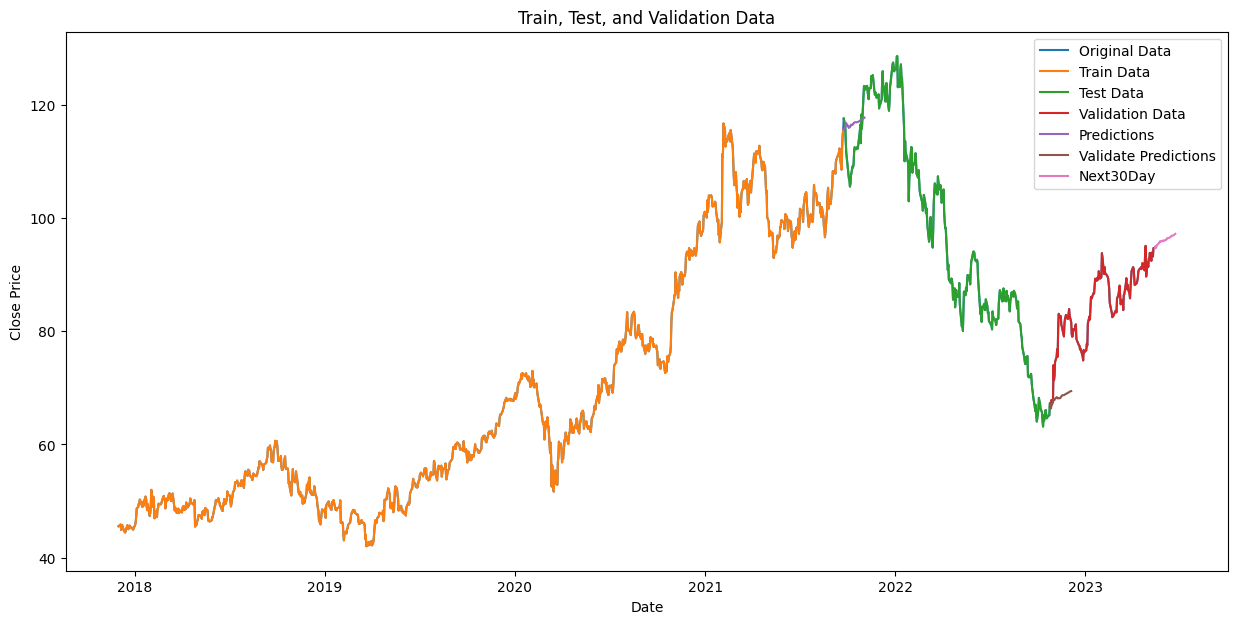

In [ ]:
#Trực quan hóa kết quả
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(train_data.index, train_data['Close'], label='Train Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(validate_data.index, validate_data['Close'], label='Validation Data')
plt.plot(fc_test_org.index, fc_test_org['Close_forecast'], label='Predictions')
plt.plot(fc_validate_org.index, fc_validate_org['Close_forecast'], label='Validate Predictions')
plt.plot(fc_30next_org.index, fc_30next_org['Close_forecast'], label='Next30Day')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Train, Test, and Validation Data')
plt.legend()
plt.show()